In [24]:
from google.colab import drive

In [25]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Question 1

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Load the datasets
path1 = "/content/drive/MyDrive/Course Work/Sem 4/Statistical Programming/Assignment 4/dataset_q1/data_1 - data_1.csv"
path2 = "/content/drive/MyDrive/Course Work/Sem 4/Statistical Programming/Assignment 4/dataset_q1/data_2 - data_2.csv"

In [28]:
data1 = pd.read_csv(path1)

In [29]:
data2 = pd.read_csv(path2)

In [30]:
# Part (i): Compute the coactivation (correlation) matrix for data1 and data2
correlation_matrix_data1 = data1.corr()
correlation_matrix_data2 = data2.corr()

In [31]:
# Part (ii): Normalize the data in both datasets to bring the values between -1 and +1
scaler = MinMaxScaler(feature_range=(-1, 1))
normalized_data1 = pd.DataFrame(scaler.fit_transform(data1), columns=data1.columns)
normalized_data2 = pd.DataFrame(scaler.fit_transform(data2), columns=data2.columns)

In [32]:
# Part (iii): Compute the correlation matrix again after normalization
normalized_correlation_matrix_data1 = normalized_data1.corr()
normalized_correlation_matrix_data2 = normalized_data2.corr()

In [33]:
# Part (iv): Perform PCA on the normalized signals to reduce their dimensionality
# Here, we choose to reduce to 10 principal components
n_components = 10
pca = PCA(n_components=n_components)
pca_data1 = pd.DataFrame(pca.fit_transform(normalized_data1))
pca_data2 = pd.DataFrame(pca.fit_transform(normalized_data2))

In [34]:
# Compute the correlation matrix for the PCA-transformed signals
pca_correlation_matrix_data1 = pca_data1.corr()
pca_correlation_matrix_data2 = pca_data2.corr()

In [35]:
# Part (v): Compare the correlation matrices before and after normalization, and after PCA
# Visualization using heatmaps
def plot_heatmap(matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(title)
    plt.show()

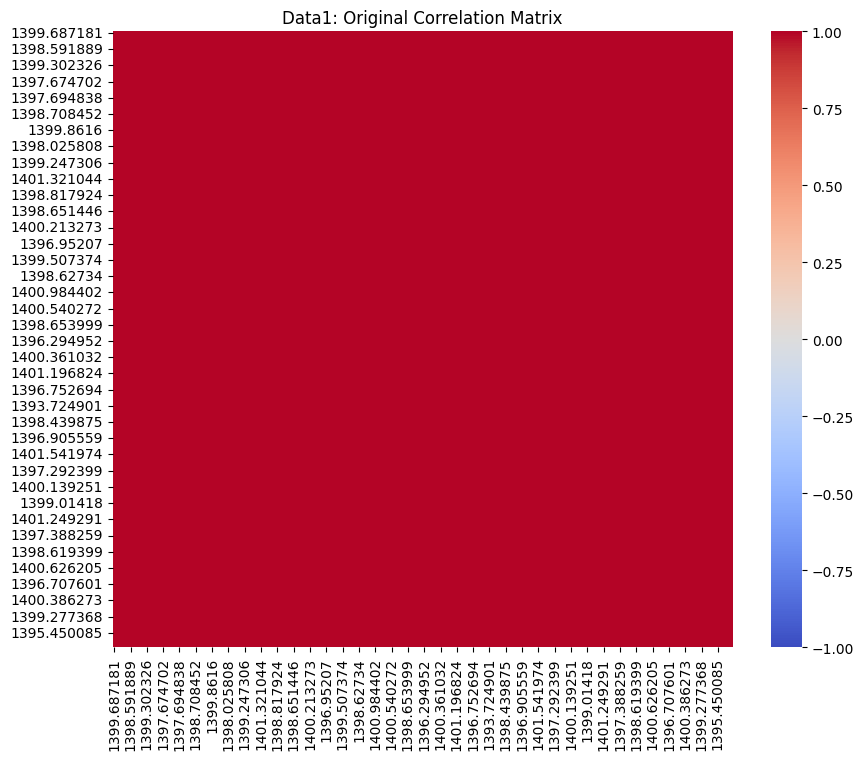

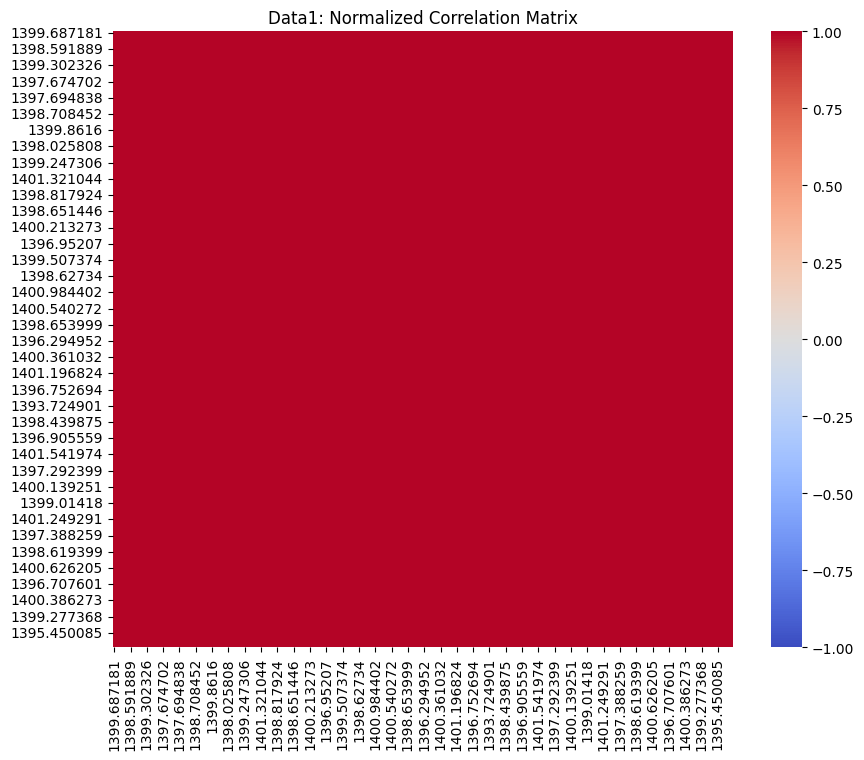

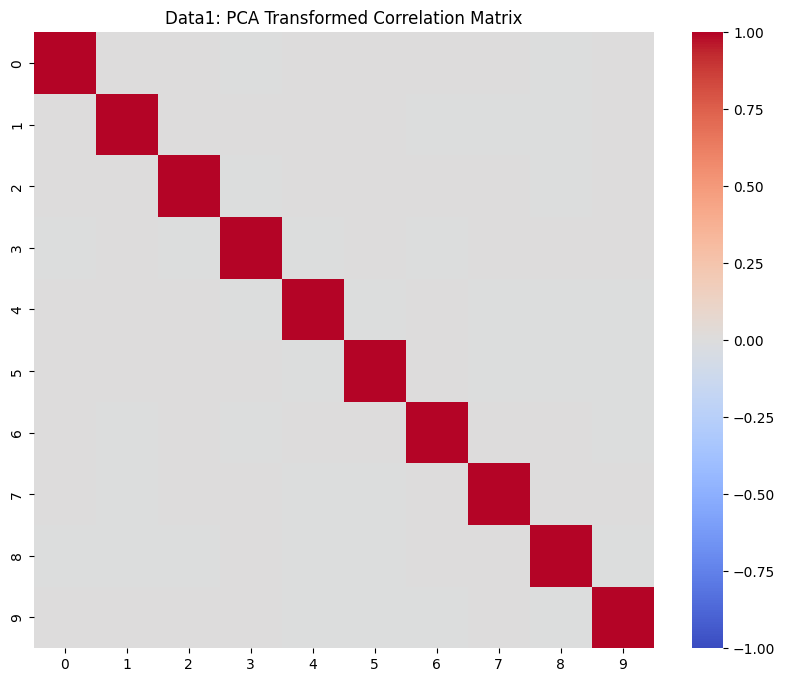

In [36]:
# Plot heatmaps for data1
plot_heatmap(correlation_matrix_data1, 'Data1: Original Correlation Matrix')
plot_heatmap(normalized_correlation_matrix_data1, 'Data1: Normalized Correlation Matrix')
plot_heatmap(pca_correlation_matrix_data1, 'Data1: PCA Transformed Correlation Matrix')

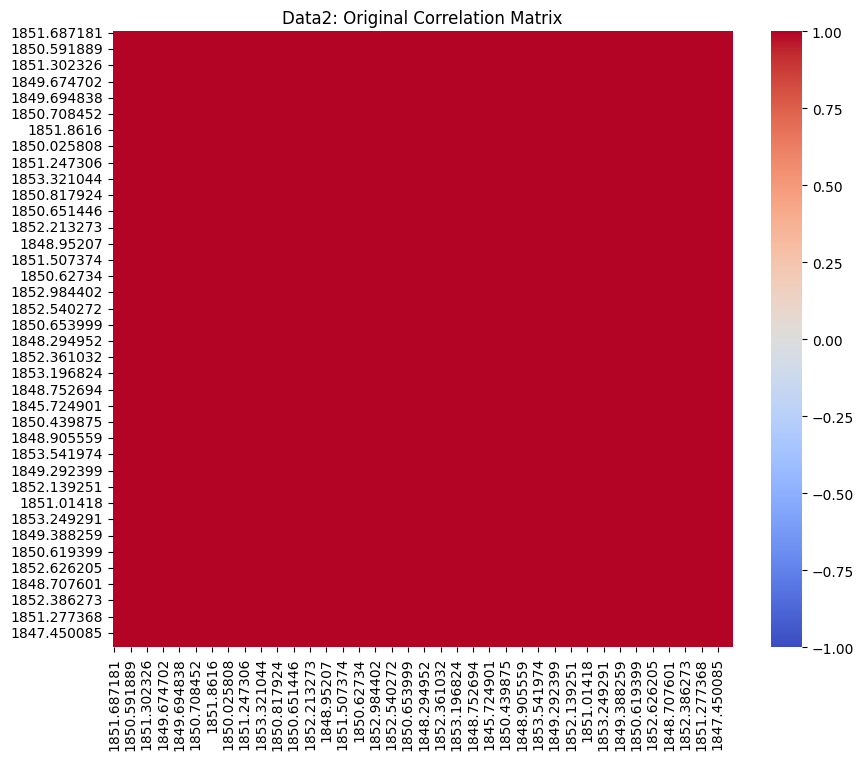

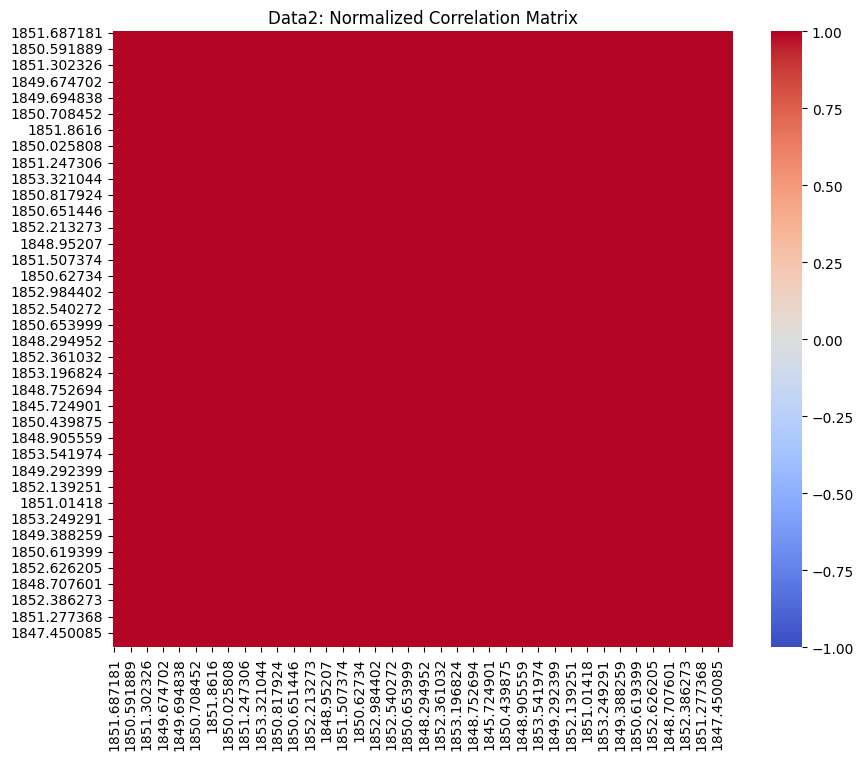

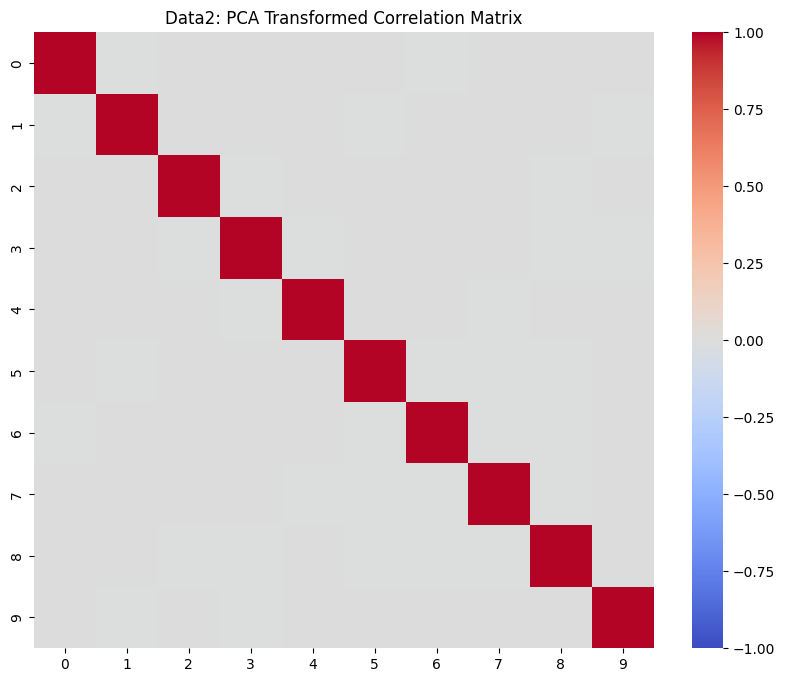

In [37]:
# Plot heatmaps for data2
plot_heatmap(correlation_matrix_data2, 'Data2: Original Correlation Matrix')
plot_heatmap(normalized_correlation_matrix_data2, 'Data2: Normalized Correlation Matrix')
plot_heatmap(pca_correlation_matrix_data2, 'Data2: PCA Transformed Correlation Matrix')

## Question 2

In [38]:
import scipy.stats as stats

In [39]:
def verify_chi_squared(n_samples=1000, mu=0, sigma=1):
    """Generate n_samples from N(mu, sigma^2) and verify the chi-squared(1) property."""
    X = np.random.normal(mu, sigma, n_samples)
    V = (X - mu) ** 2 / sigma ** 2

    # Plot histogram of V and theoretical chi-squared(1) distribution
    plt.figure(figsize=(8, 5))
    plt.hist(V, bins=50, density=True, alpha=0.6, color='b', label='Empirical Distribution')
    x = np.linspace(0, max(V), 1000)
    plt.plot(x, stats.chi2.pdf(x, df=1), label="Chi-squared(1) Theoretical", color='red')

    plt.xlabel(r'$V = \frac{(X - \mu)^2}{\sigma^2}$')
    plt.ylabel('Density')
    plt.title(f'Empirical Verification of $\chi^2(1)$ Distribution (n={n})')
    plt.legend()
    plt.grid()
    plt.show()

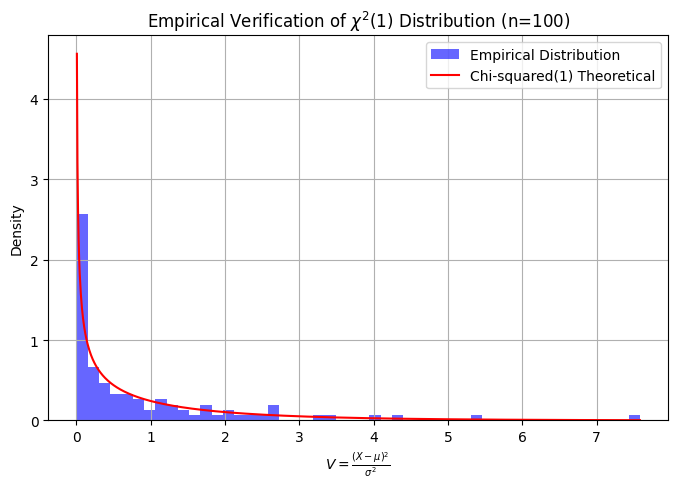

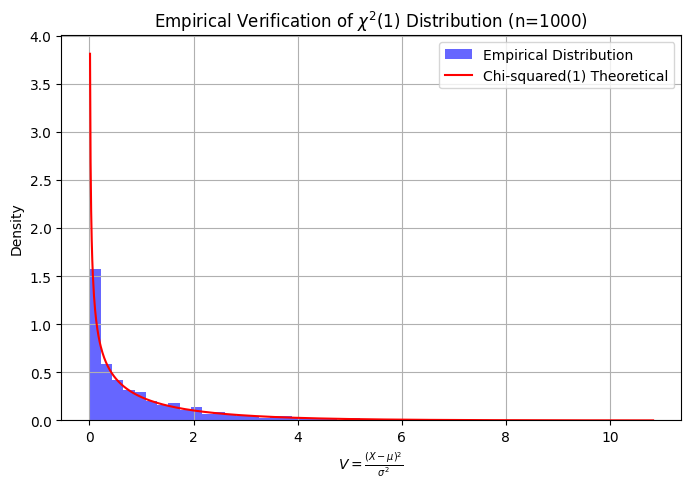

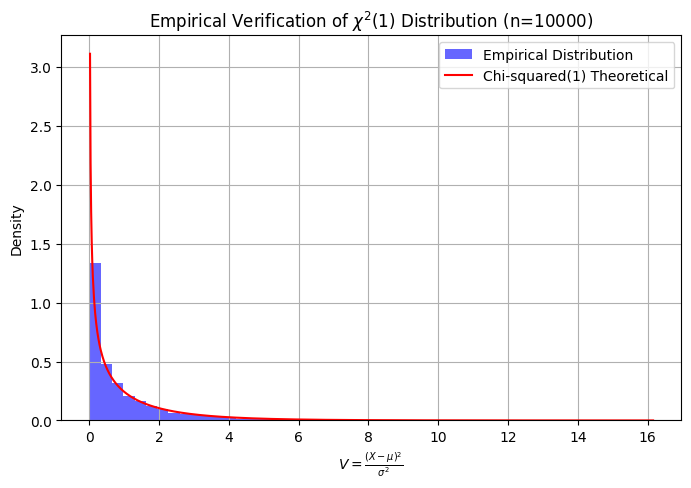

In [40]:
# Test for different sample sizes
for n in [100, 1000, 10000]:
    verify_chi_squared(n)

## Question 3


In [41]:
def analyze_gaussian_data(data):
    # Compute mean and variance
    mu = np.mean(data)
    sigma2 = np.var(data)
    sigma = np.sqrt(sigma2)
    print(f"Mean (µ): {mu}")
    print(f"Variance (σ²): {sigma2}")

    # Verify empirical rule
    within_1sigma = np.mean((mu - sigma <= data) & (data <= mu + sigma)) * 100
    within_2sigma = np.mean((mu - 2*sigma <= data) & (data <= mu + 2*sigma)) * 100
    within_3sigma = np.mean((mu - 3*sigma <= data) & (data <= mu + 3*sigma)) * 100

    print(f"Percentage within 1σ: {within_1sigma:.2f}% (Expected: 68%)")
    print(f"Percentage within 2σ: {within_2sigma:.2f}% (Expected: 95%)")
    print(f"Percentage within 3σ: {within_3sigma:.2f}% (Expected: 99.7%)")

    # Compute the CDF
    cdf = stats.norm.cdf(data, loc=mu, scale=sigma)
    cdf_2sigma = stats.norm.cdf(mu + 2*sigma, loc=mu, scale=sigma)
    beyond_2sigma_prob = 1 - cdf_2sigma
    print(f"Probability of data points beyond +2σ: {beyond_2sigma_prob:.4f}")
    print(f"Probability of data points beyond -2σ: {beyond_2sigma_prob:.4f}")
    print(f"Total probability beyond ±2σ: {2 * beyond_2sigma_prob:.4f}")

    plt.figure(figsize=(12, 5))

    # Histogram of the dataset
    plt.subplot(1, 2, 1)
    plt.hist(data, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', label="Theoretical Gaussian PDF")
    plt.axvline(mu, color='k', linestyle='dashed', linewidth=2, label="Mean (μ)")
    plt.axvline(mu + sigma, color='b', linestyle='dotted', linewidth=2, label="μ + 1σ")
    plt.axvline(mu - sigma, color='b', linestyle='dotted', linewidth=2)
    plt.axvline(mu + 2*sigma, color='orange', linestyle='dotted', linewidth=2, label="μ + 2σ")
    plt.axvline(mu - 2*sigma, color='orange', linestyle='dotted', linewidth=2)
    plt.axvline(mu + 3*sigma, color='purple', linestyle='dotted', linewidth=2, label="μ + 3σ")
    plt.axvline(mu - 3*sigma, color='purple', linestyle='dotted', linewidth=2)
    plt.title("Histogram of Data with Gaussian Fit")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()

    # CDF Plot
    plt.subplot(1, 2, 2)
    plt.plot(x, stats.norm.cdf(x, mu, sigma), 'b-', label="Theoretical Gaussian CDF")
    plt.axhline(cdf_2sigma, color='r', linestyle='dashed', linewidth=2, label="CDF at 2σ")
    plt.axvline(mu + 2*sigma, color='r', linestyle='dotted', linewidth=2, label="2σ Threshold")
    plt.title("Cumulative Distribution Function (CDF)")
    plt.xlabel("Value")
    plt.ylabel("Cumulative Probability")
    plt.legend()

    plt.tight_layout()
    plt.show()

Mean (µ): 50.27820384569586
Variance (σ²): 117.72528046241388
Percentage within 1σ: 69.70% (Expected: 68%)
Percentage within 2σ: 94.80% (Expected: 95%)
Percentage within 3σ: 99.50% (Expected: 99.7%)
Probability of data points beyond +2σ: 0.0228
Probability of data points beyond -2σ: 0.0228
Total probability beyond ±2σ: 0.0455


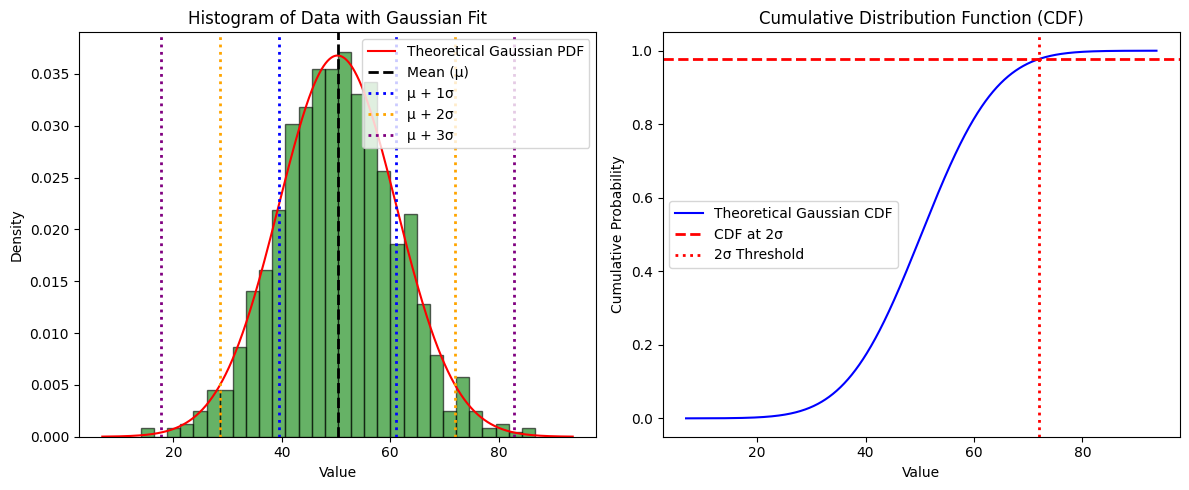

In [42]:
# Example usage with random Gaussian data + noise
data = np.random.normal(50, 10, 1000) + np.random.uniform(-5, 5, 1000)
analyze_gaussian_data(data)